In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pprint

from math import sqrt, fabs
from scipy.optimize import minimize
from IPython.display import Image
from matplotlib.pyplot import imshow

sys.path.append('../')
from map import Map
from optimizer import *

plt.rcParams['figure.figsize'] = [24, 16] # default is [6.0, 4.0], good value is [24, 16]
plt.rcParams['figure.dpi'] = 50 # default is 72, good value is 50


A picture taken from the Aiguille du Midi.
[('Aiguille du Triolet', (45.9169134, 7.0246497), (1084, 511), 195),
 ('Aiguille de Talefre', (45.8999213, 7.0040026), (975, 384), 290),
 ('Aiguille de Leschaux', (45.8874995, 7.0069444), (990, 294), 401),
 ('Point Walker', (45.8688259, 6.9879852), (904, 155), 573),
 ('Dent du Geant', (45.8622473, 6.9518381), (713, 107), 738)]


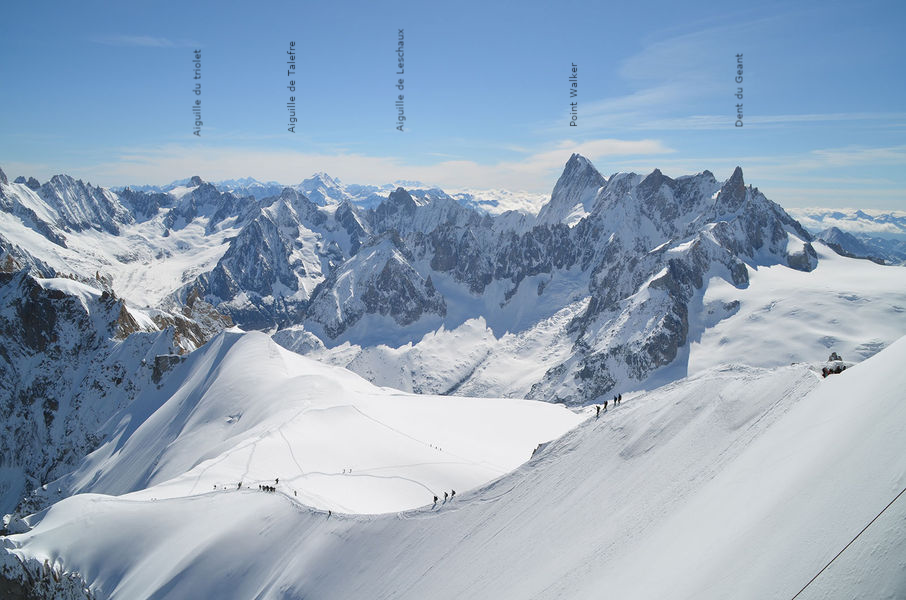

In [2]:
import data.aiguillemidi1 as data
print(format(data.description))
pprint.pprint(data.points)
Image(filename=data.picture)

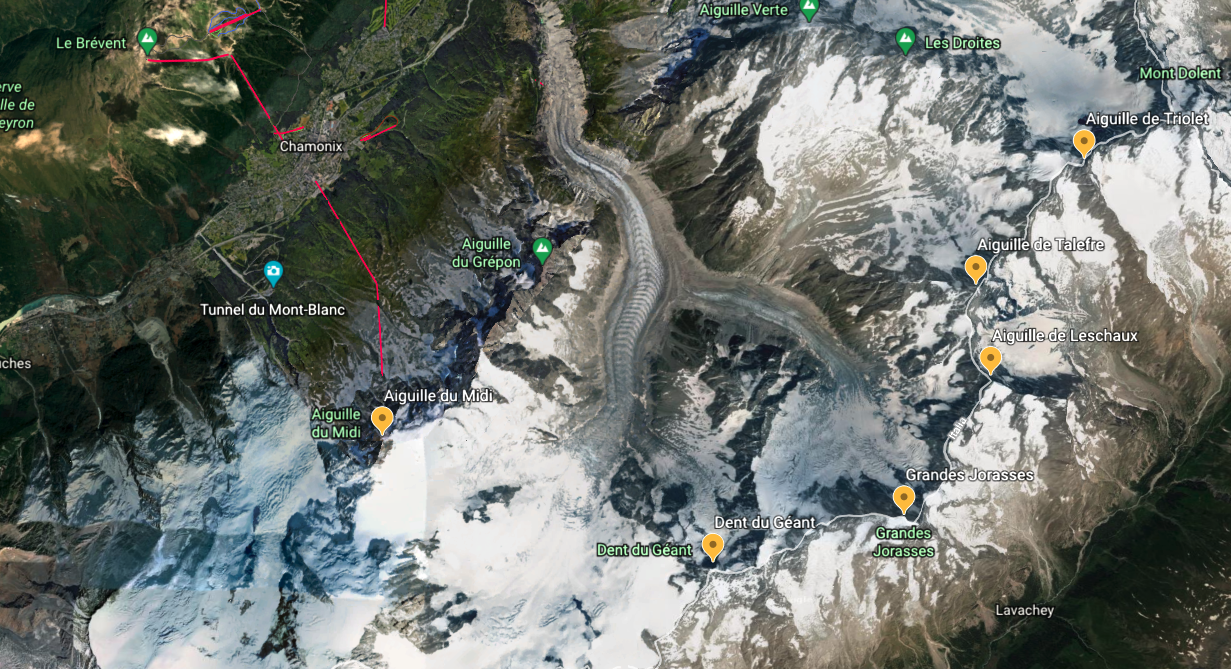

In [3]:
Image(filename=data.map)

Barrycenter: (483.5929472961555, 306.00481622306717)


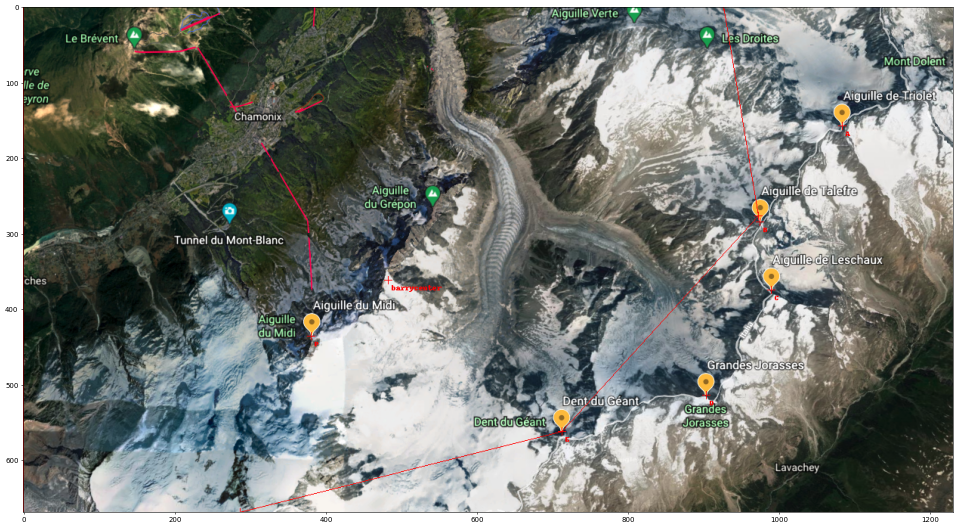

In [4]:
# Create a map and start drawing summits, photographer and area
map = Map(file=data.map)
for (summit, name) in zip(data.summits, "ABCDEFGHIKLMNOPQRSTUVWXYZ"):
    map.draw_point(summit, name, color="red")

if data.photographer is not None:
    map.draw_point(data.photographer, "P", color="red")

area = photographer_area(data.summits, data.dimensions)
map.draw_area(area, color="red")

barrycenter = barycenter(area)
map.draw_point(barrycenter, "barrycenter", color="red")
print("Barrycenter:", barrycenter)

map.show()

Optimizer:
  photographer: [441.17729929 217.89025589]
  error: 1.326807448287894e-12

Reality  :
  photographer: (381, 233)
  error: 2.675450057030511e-05



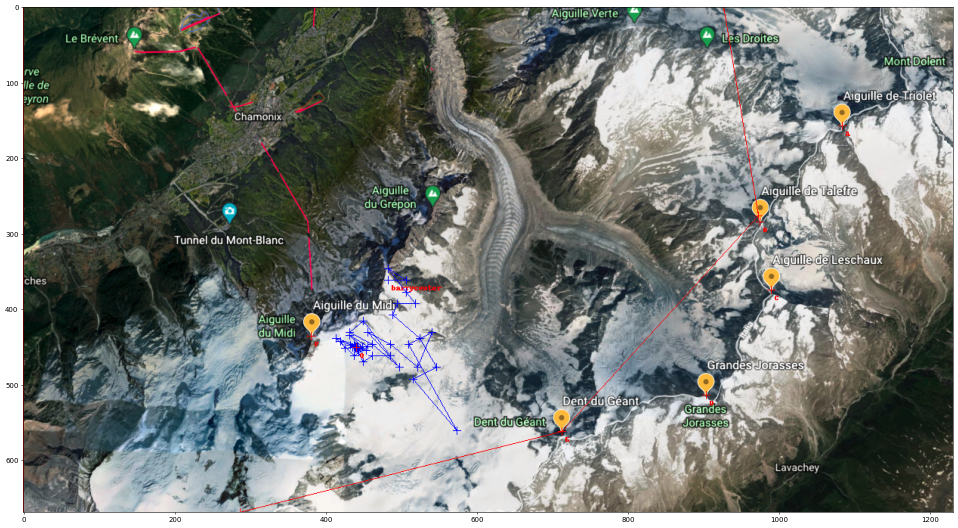

In [5]:
# Run the optimizer to locate the photographer
photograper, error, path = find_photograper(
    dimensions=map.dimensions,
    summits=data.summits,
    projections=data.projections
)
print("Optimizer:\n  photographer: {}\n  error: {}\n".format(photograper, error))
#pprint.pprint(path)

# Compute error at real location (or barrycenter)
refname, refpos = "Barrycenter", barrycenter
if data.photographer is not None:
    refname, refpos = "Reality", data.photographer
res = optimize_picture(photographer=refpos, summits=data.summits, projections=data.projections)
print("{}  :\n  photographer: {}\n  error: {}\n".format(refname, refpos, res.error))

# Display optimized position of the photographer
map.draw_path(path, color="blue")
map.draw_point(photograper, name="Q", color="red")

map.show()

In [6]:
def errorfun(point):
    return optimize_picture(point, data.summits, data.projections).error

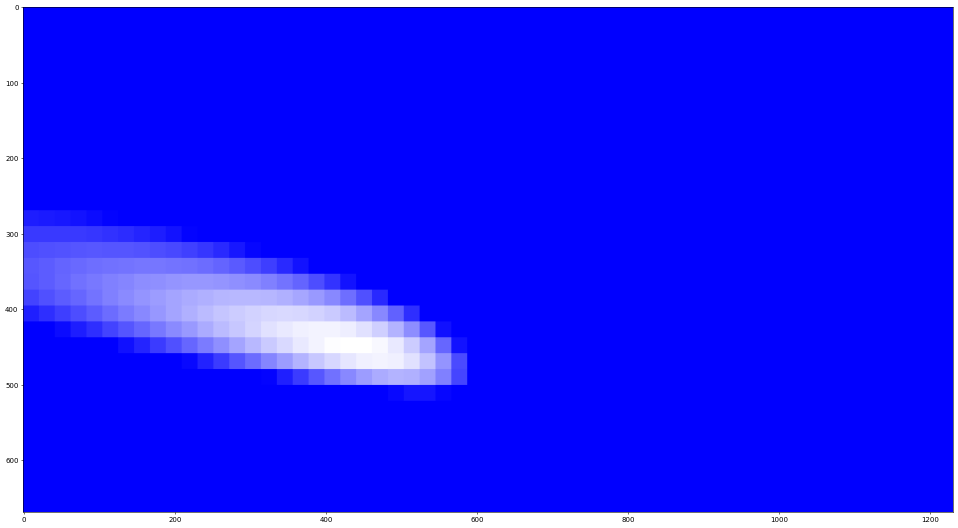

In [9]:
map.hot_colorize(
    colorfun=errorfun,
    transfun=lambda x: 100000*x),
    incr=10,
)

map.show()